In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

from visualizer.csa import CMA_CSA

In [2]:
def get_better_than_percentage(score, score_list):
    score_list.sort() # asc
    print("---")
    print(score_list)
    print(score)
    index = easy_search(score, score_list)
    print((index / len(score_list)) * 100)
    return (index / len(score_list)) * 100

def easy_search(score, score_list):
    for i in range(0, len(score_list)):
        if not score > score_list[i]:
            return i
    return len(score_list)

In [4]:
from collections import namedtuple
Func = namedtuple('Func', ('expression', 'solution'))
quadratic1 = Func(lambda x1, x2: (x1 - 3) ** 2 + (x2 + 2) ** 2, (3, -2))


In [9]:
def main():
    optimizer = CMA_CSA(mean=np.array([-1000.0, 280.0]), sigma=1.3, population_size = 100)

    expert_better_than_percentages = []
    expert_scores = []
    expert_positions_with_score = []
    sigmas = []
    population_positions_with_score = {}
    iterations = 0
    while True:
        print(f"Iterations: {iterations}")
        population = []
        population_scores = []
        population_positions_with_score[iterations] = []
        for _ in range(optimizer.population_size):
            x = optimizer.ask()
            value = quadratic1.expression(x[0], x[1])
            population_scores.append(value)
            population.append((x, value))
            population_positions_with_score[iterations].append((x[0], x[1], value))

        expert_score = round(quadratic1.expression(optimizer._mean[0], optimizer._mean[1]), 5)
        expert_scores.append(expert_score)
        
        # calculate how large percent of pop was below expert's score
        expert_percentile = get_better_than_percentage(expert_score, population_scores)
        expert_better_than_percentages.append(expert_percentile)
        
        expert_positions_with_score.append((optimizer._mean[0], optimizer._mean[1], expert_score))
        
        sigma, = optimizer.tell(population)
        sigmas.append(sigma)
        
        iterations += 1
        if optimizer.should_stop():
            break

    return expert_better_than_percentages, expert_scores, expert_positions_with_score, sigmas, iterations, population_positions_with_score



expert_better_than_percentages, expert_scores, expert_positions_with_score, sigmas, iterations, population_positions_with_score = main()
# qualities, mean_qualities, mean_3d_vector, sigmas, iterations = main()

print(f"Performed {iterations} iterations")

Iterations: 0
---
[1079692.1176543403, 1079759.7599332815, 1080060.0730104032, 1080354.3955053044, 1080698.4327239604, 1080888.9875115377, 1081700.5571429685, 1081733.5009127613, 1081751.650776257, 1081779.7784494653, 1081802.7894671017, 1081906.0405378935, 1082046.5380639883, 1082294.615364702, 1082333.4264028347, 1082347.684723318, 1082538.4921174566, 1082571.3999877013, 1082658.8539421337, 1082803.1386029194, 1082856.0947715798, 1082911.5024007063, 1082956.076608242, 1082996.9394485848, 1083016.7256881197, 1083145.3598659139, 1083149.5636612002, 1083176.3169869396, 1083458.5026414385, 1083497.0643227494, 1083558.6071121187, 1083775.8182931517, 1083817.280115817, 1083937.1130046665, 1084110.4401696979, 1084247.307320064, 1084258.4244115343, 1084362.3465321644, 1084391.2782792903, 1084475.7396764825, 1084519.2268906913, 1084553.978555911, 1084575.7664960502, 1084580.1675181924, 1084707.2977968473, 1084839.401520271, 1084860.062575219, 1085028.051976211, 1085047.6853688315, 1085174.015

---
[0.7247112006817625, 0.7530764275407598, 1.317662587637192, 1.4001550759380244, 2.445620912681105, 2.891760706396478, 4.10007495605792, 6.818867608737075, 8.415930894365617, 9.05452623609074, 10.921514525733922, 11.18973560896425, 11.512218739744432, 13.16269914029192, 15.118147488628395, 16.3234946481041, 18.00162816611077, 21.594593465547472, 24.58478348197171, 24.58508917247062, 24.836332067829034, 27.643388964116898, 28.61057004397667, 28.761086363551627, 33.37301286765928, 34.19156905782561, 34.76852703676169, 35.523182322594025, 38.279714508381325, 38.96998904133398, 39.53103032580021, 41.7289064081296, 51.826476645197985, 55.73777920992351, 55.85969200843519, 56.294592469068185, 58.829662507657766, 59.989174428265926, 60.08284362186998, 60.68193061731134, 61.85877061915664, 61.86421149015624, 63.558523037429495, 66.81848519304171, 69.20834387371474, 73.04170353022964, 74.14145226677597, 77.76768159099674, 78.46866583057292, 79.43320556986521, 79.46894753338321, 81.0458893526

Iterations: 119
---
[1.2352010889901961e-05, 4.6595433538922485e-05, 4.686535815004188e-05, 5.76088182173419e-05, 9.467176088238034e-05, 9.764234566789505e-05, 0.00011232844698520177, 0.00011487412259984675, 0.00013966788282217761, 0.00020339766712602152, 0.00022122621328761087, 0.00028202405694349606, 0.00035349455225471775, 0.0004045586158490576, 0.000415551295729863, 0.00045642149439449576, 0.0004594434933732093, 0.0004889628755172102, 0.0005002962831759109, 0.0005093435308507581, 0.0005449336353175391, 0.0005673320116721912, 0.0005709748552357804, 0.0005787068385438703, 0.0006396414787220225, 0.0006859474233277471, 0.0007115747311371063, 0.0007463480391215953, 0.0007818307759280234, 0.0007826794793736929, 0.0008769192416667815, 0.0009246239308282392, 0.0009272514852108386, 0.0009523940299434848, 0.0009890021685656206, 0.0010190491687011455, 0.001048198198688977, 0.0011211668892796805, 0.001126036007889755, 0.0013204416339399397, 0.0013225666572396382, 0.0013610293245622798, 0.00138

---
[2.1283994413414136e-13, 3.836423760849214e-11, 1.1047262747369157e-10, 1.1567352942122179e-10, 2.2357315804326678e-10, 2.869566560013454e-10, 3.2310582896898737e-10, 6.429441086129283e-10, 7.528681254505733e-10, 1.1517030090676298e-09, 1.2385725921100053e-09, 1.2736167284788276e-09, 1.5119674840778408e-09, 1.5983659258405566e-09, 1.6206343146602975e-09, 1.8324339518969407e-09, 1.864442203024417e-09, 1.932588719178588e-09, 2.0552220873976772e-09, 2.1289417477347953e-09, 2.229076868689077e-09, 2.3344133126960356e-09, 2.3353662151722212e-09, 2.3846577195007205e-09, 2.9271807090050166e-09, 3.16817902975589e-09, 3.25787339487785e-09, 3.4180984879212998e-09, 3.4498600195394717e-09, 3.983274156713656e-09, 4.005609737610797e-09, 4.027549174537234e-09, 4.272817874604773e-09, 4.4320015065992e-09, 4.757114774625122e-09, 5.3753232344798995e-09, 5.516855903777791e-09, 5.654106259504774e-09, 5.666246917601192e-09, 6.4204500770610385e-09, 6.466061130214463e-09, 6.565168965785729e-09, 6.593749594

---
[1.9331279620939503e-16, 2.875622519196e-16, 2.156759825843057e-15, 2.3638263318955604e-15, 2.5284342153411587e-15, 2.8332553622895803e-15, 4.153129169413192e-15, 4.172828014098042e-15, 4.305244519810393e-15, 4.4341227404605045e-15, 4.5092773093018954e-15, 4.536844975051875e-15, 5.254033709733287e-15, 5.54691942388892e-15, 5.925856910431256e-15, 6.134184801645114e-15, 6.453434294357381e-15, 6.666355824160834e-15, 7.615408973274883e-15, 8.371051369525379e-15, 8.411842860673672e-15, 8.57832064057274e-15, 8.859426928112603e-15, 9.207002384017395e-15, 9.53759139004239e-15, 1.008863185716881e-14, 1.0252466645421326e-14, 1.0933555485964155e-14, 1.2301159511881761e-14, 1.2702080777650638e-14, 1.2898136593195207e-14, 1.3316687002983778e-14, 1.355910213293338e-14, 1.3963256667515817e-14, 1.43114739846338e-14, 1.450718158298684e-14, 1.7387230231615894e-14, 1.7627635536938115e-14, 1.774764300131429e-14, 1.9663422201917744e-14, 1.989788240789008e-14, 2.141938722730905e-14, 2.398072193183025e-1

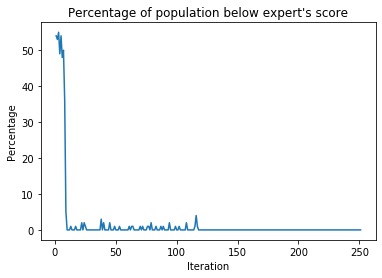

In [10]:
plt.title("Percentage of population below expert's score")
plt.ylabel("Percentage")
plt.xlabel("Iteration")
plt.plot([i for i in range(1, len(expert_better_than_percentages) + 1)], expert_better_than_percentages)

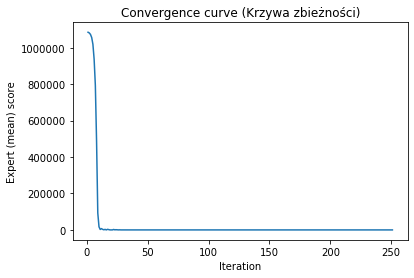

In [31]:
plt.title("Convergence curve (Krzywa zbieżności)")
plt.ylabel("Expert (mean) score")
plt.xlabel("Iteration")
plt.plot([i for i in range(1, len(expert_scores) + 1)], expert_scores)

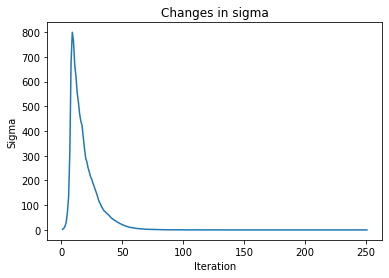

In [32]:
plt.title("Changes in sigma")
plt.ylabel("Sigma")
plt.xlabel("Iteration")
plt.plot([i for i in range(1, len(sigmas) + 1)], sigmas)

In [14]:
data = np.array(expert_positions_with_score)

In [15]:
# x = np.linspace(-1000, 1000, 30)
# y = np.linspace(-1000, 1000, 30)

# X, Y = np.meshgrid(x, y)
# Z = quadratic1.expression(X, Y)


# fig = plt.figure(figsize=(20,20))
# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='binary')

# ax = plt.axes(projection='3d')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none', alpha=0.5)
# ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
# ax.set_title('surface')

# ax.view_init(30, 30)
# # fig

ValueError: Unknown projection '3d'

<Figure size 1440x1440 with 0 Axes>

In [29]:
x = np.linspace(-2000, 2000, 30)
y = np.linspace(-2000, 2000, 30)

X, Y = np.meshgrid(x, y)
Z = quadratic1.expression(X, Y)

iteration = 8
data_pop = np.array(population_positions_with_score[iteration])


fig = go.Figure(data=[go.Surface(z=Z, x=x, y=y, opacity=0.5), 
                      go.Scatter3d(
    x=data[:, 0],
    y=data[:, 1],
    z=data[:, 2],
    mode='markers',
    marker=dict(
#         size=12,
#         color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
    )),go.Scatter3d(
    x=data_pop[:, 0],
    y=data_pop[:, 1],
    z=data_pop[:, 2],
    mode='markers',
    marker=dict(
#         size=12,
        color='Green',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
    )
)])
fig.update_layout(title='Quadratic', autosize=True,
#                   width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()